In [53]:
!pip install seaborn

In [54]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
import pandas as pd
from prophet import Prophet
import datetime as dt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [55]:
df = pd.read_csv("Resources/HR_Analytics.csv").dropna()

In [56]:
del df['EmpID']
del df['StandardHours']
del df['EmployeeCount']
del df['Over18']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1423 non-null   int64  
 1   AgeGroup                  1423 non-null   object 
 2   Attrition                 1423 non-null   object 
 3   BusinessTravel            1423 non-null   object 
 4   DailyRate                 1423 non-null   int64  
 5   Department                1423 non-null   object 
 6   DistanceFromHome          1423 non-null   int64  
 7   Education                 1423 non-null   int64  
 8   EducationField            1423 non-null   object 
 9   EmployeeNumber            1423 non-null   int64  
 10  EnvironmentSatisfaction   1423 non-null   int64  
 11  Gender                    1423 non-null   object 
 12  HourlyRate                1423 non-null   int64  
 13  JobInvolvement            1423 non-null   int64  
 14  JobLevel     

In [58]:
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [59]:
df.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,...,3,3,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,411,...,3,1,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,...,3,4,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,...,3,4,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1156,...,3,4,0,0,0,3,0,0,0,0.0


In [60]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.00000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,...,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000
mean,36.924807,802.000000,9.262825,2.907238,1063.66409,2.726634,66.000703,2.726634,2.070274,2.725228,...,3.151089,2.701335,0.797611,11.302881,2.799719,2.761771,7.042164,4.255095,2.211525,4.118060
std,9.133367,404.008071,8.146760,1.023547,595.37789,1.089736,20.373292,0.712882,1.107122,1.100302,...,0.358262,1.081122,0.850958,7.819449,1.288246,0.710698,6.147705,3.631051,3.248210,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,550.50000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1066.00000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1587.50000,4.000000,84.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.00000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [61]:
for col in df.columns:
    if len(df[col].unique()) <= 10:
        print(f"{col}: {df[col].unique()}")

AgeGroup: ['18-25' '26-35' '36-45' '46-55' '55+']
Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TravelRarely']
Department: ['Research & Development' 'Sales' 'Human Resources']
Education: [3 2 1 4 5]
EducationField: ['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']
EnvironmentSatisfaction: [3 4 2 1]
Gender: ['Male' 'Female']
JobInvolvement: [3 2 1 4]
JobLevel: [1 2 3 4 5]
JobRole: ['Laboratory Technician' 'Sales Representative' 'Research Scientist'
 'Human Resources' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Director' 'Manager']
JobSatisfaction: [3 2 4 1]
MaritalStatus: ['Single' 'Divorced' 'Married']
SalarySlab: ['Upto 5k' '5k-10k' '10k-15k' '15k+']
NumCompaniesWorked: [1 0 5 6 3 2 9 8 7 4]
OverTime: ['No' 'Yes']
PerformanceRating: [3 4]
RelationshipSatisfaction: [3 1 4 2]
StockOptionLevel: [0 2 1 3]
TrainingTimesLastYear: [2 3 0 5 4 6 1]
WorkLifeBalance: [3 4 1 2]


In [62]:
df["ProportionAtCompany"] = np.where(df["TotalWorkingYears"] == 0, 1, df["YearsAtCompany"] / df["TotalWorkingYears"])

In [63]:
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'ProportionAtCompany'],
      dtype='object')

In [64]:
'''
cat_cols = ['AgeGroup', 'Attrition', 'BusinessTravel', 'Department',
            'Education', 'EducationField', 'EnvironmentSatisfaction',
            'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
            'JobSatisfaction', 'MaritalStatus', 'SalarySlab',
            'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
num_cols = [col for col in df.columns if col not in cat_cols]
'''

cat_cols = ['AgeGroup', 'Attrition', 'BusinessTravel', 'Department',
            'Education', 'EducationField', 'EnvironmentSatisfaction',
            'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
            'JobSatisfaction', 'MaritalStatus', 'SalarySlab',
            'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'WorkLifeBalance']

num_cols = ['Age', 'DailyRate', 'DistanceFromHome',
            'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
            'YearsSinceLastPromotion', 'YearsWithCurrManager', 'ProportionAtCompany']

In [65]:
display(df[cat_cols])
display(df[num_cols])

,AgeGroup,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,SalarySlab,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,18-25,Yes,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Laboratory Technician,3,Single,Upto 5k,No,3,3,0,3
1,18-25,No,Travel_Rarely,Sales,3,Medical,4,Female,2,1,Sales Representative,3,Single,Upto 5k,No,3,1,0,3
2,18-25,Yes,Travel_Frequently,Sales,3,Marketing,2,Male,3,1,Sales Representative,2,Single,Upto 5k,Yes,3,4,0,3
3,18-25,No,Non-Travel,Research & Development,2,Life Sciences,2,Male,3,1,Research Scientist,4,Single,Upto 5k,No,3,4,0,3
4,18-25,Yes,Non-Travel,Research & Development,1,Medical,3,Male,3,1,Laboratory Technician,3,Single,Upto 5k,No,3,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,55+,No,Travel_Rarely,Research & Development,3,Life Sciences,1,Female,3,5,Manager,1,Married,15k+,No,3,4,0,1
1476,55+,No,Travel_Frequently,Sales,3,Marketing,3,Female,2,3,Sales Executive,1,Married,10k-15k,No,3,4,0,4
1477,55+,No,Travel_Rarely,Sales,4,Marketing,1,Male,3,2,Sales Executive,1,Single,5k-10k,No,3,4,0,3
1478,55+,No,Travel_Rarely,Sales,4,Marketing,2,Male,4,2,Sales Executive,4,Divorced,5k-10k,Yes,3,2,1,3


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProportionAtCompany
0,18,230,3,54,1420,25233,1,13,0,2,0,0,0,0.0,1.000000
1,18,812,10,69,1200,9724,1,12,0,2,0,0,0,0.0,1.000000
2,18,1306,5,69,1878,8059,1,14,0,3,0,0,0,0.0,1.000000
3,18,287,5,73,1051,13493,1,15,0,2,0,0,0,0.0,1.000000
4,18,247,8,80,1904,13556,1,12,0,0,0,0,0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,422,7,41,19566,3854,5,11,33,5,29,8,11,10.0,0.878788
1476,60,1499,28,80,10266,2845,4,19,22,5,18,13,13,11.0,0.818182
1477,60,1179,16,84,5405,11924,8,14,10,1,2,2,2,2.0,0.200000
1478,60,696,7,52,5220,10893,0,18,12,3,11,7,1,9.0,0.916667


In [66]:
df.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProportionAtCompany
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,...,3,0,0,2,3,0,0,0,0.0,1.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,411,...,1,0,0,2,3,0,0,0,0.0,1.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,...,4,0,0,3,3,0,0,0,0.0,1.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,...,4,0,0,2,3,0,0,0,0.0,1.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1156,...,4,0,0,0,3,0,0,0,0.0,1.0


In [67]:
attrition_group = df.groupby(df['Attrition'])
for attrition_status, group in attrition_group:
    print(f"Attrition: {attrition_status}")
    for col in group.columns:
        if group[col].dtype != "object":
            print(f"{col}: {group[col].mean()}")
    print("--------------------")

Attrition: No
Age: 37.5406538139145
DailyRate: 811.8466051969824
DistanceFromHome: 8.983235540653814
Education: 2.9186923721709976
EmployeeNumber: 1067.799664710813
EnvironmentSatisfaction: 2.7736797988264876
HourlyRate: 66.07963118189438
JobInvolvement: 2.766135792120704
JobLevel: 2.1533948030176027
JobSatisfaction: 2.774518021793797
MonthlyIncome: 6857.795473595977
MonthlyRate: 14259.422464375524
NumCompaniesWorked: 2.658005029337804
PercentSalaryHike: 15.224643755238894
PerformanceRating: 3.151718357082984
RelationshipSatisfaction: 2.7200335289186923
StockOptionLevel: 0.8516345347862532
TotalWorkingYears: 11.891869237217099
TrainingTimesLastYear: 2.8357082984073765
WorkLifeBalance: 2.7820620284995807
YearsAtCompany: 7.4174350377200335
YearsInCurrentRole: 4.5155071248952225
YearsSinceLastPromotion: 2.264040234702431
YearsWithCurrManager: 4.373009220452641
ProportionAtCompany: 0.6875057046505009
--------------------
Attrition: Yes
Age: 33.7304347826087
DailyRate: 750.9260869565218
Dis

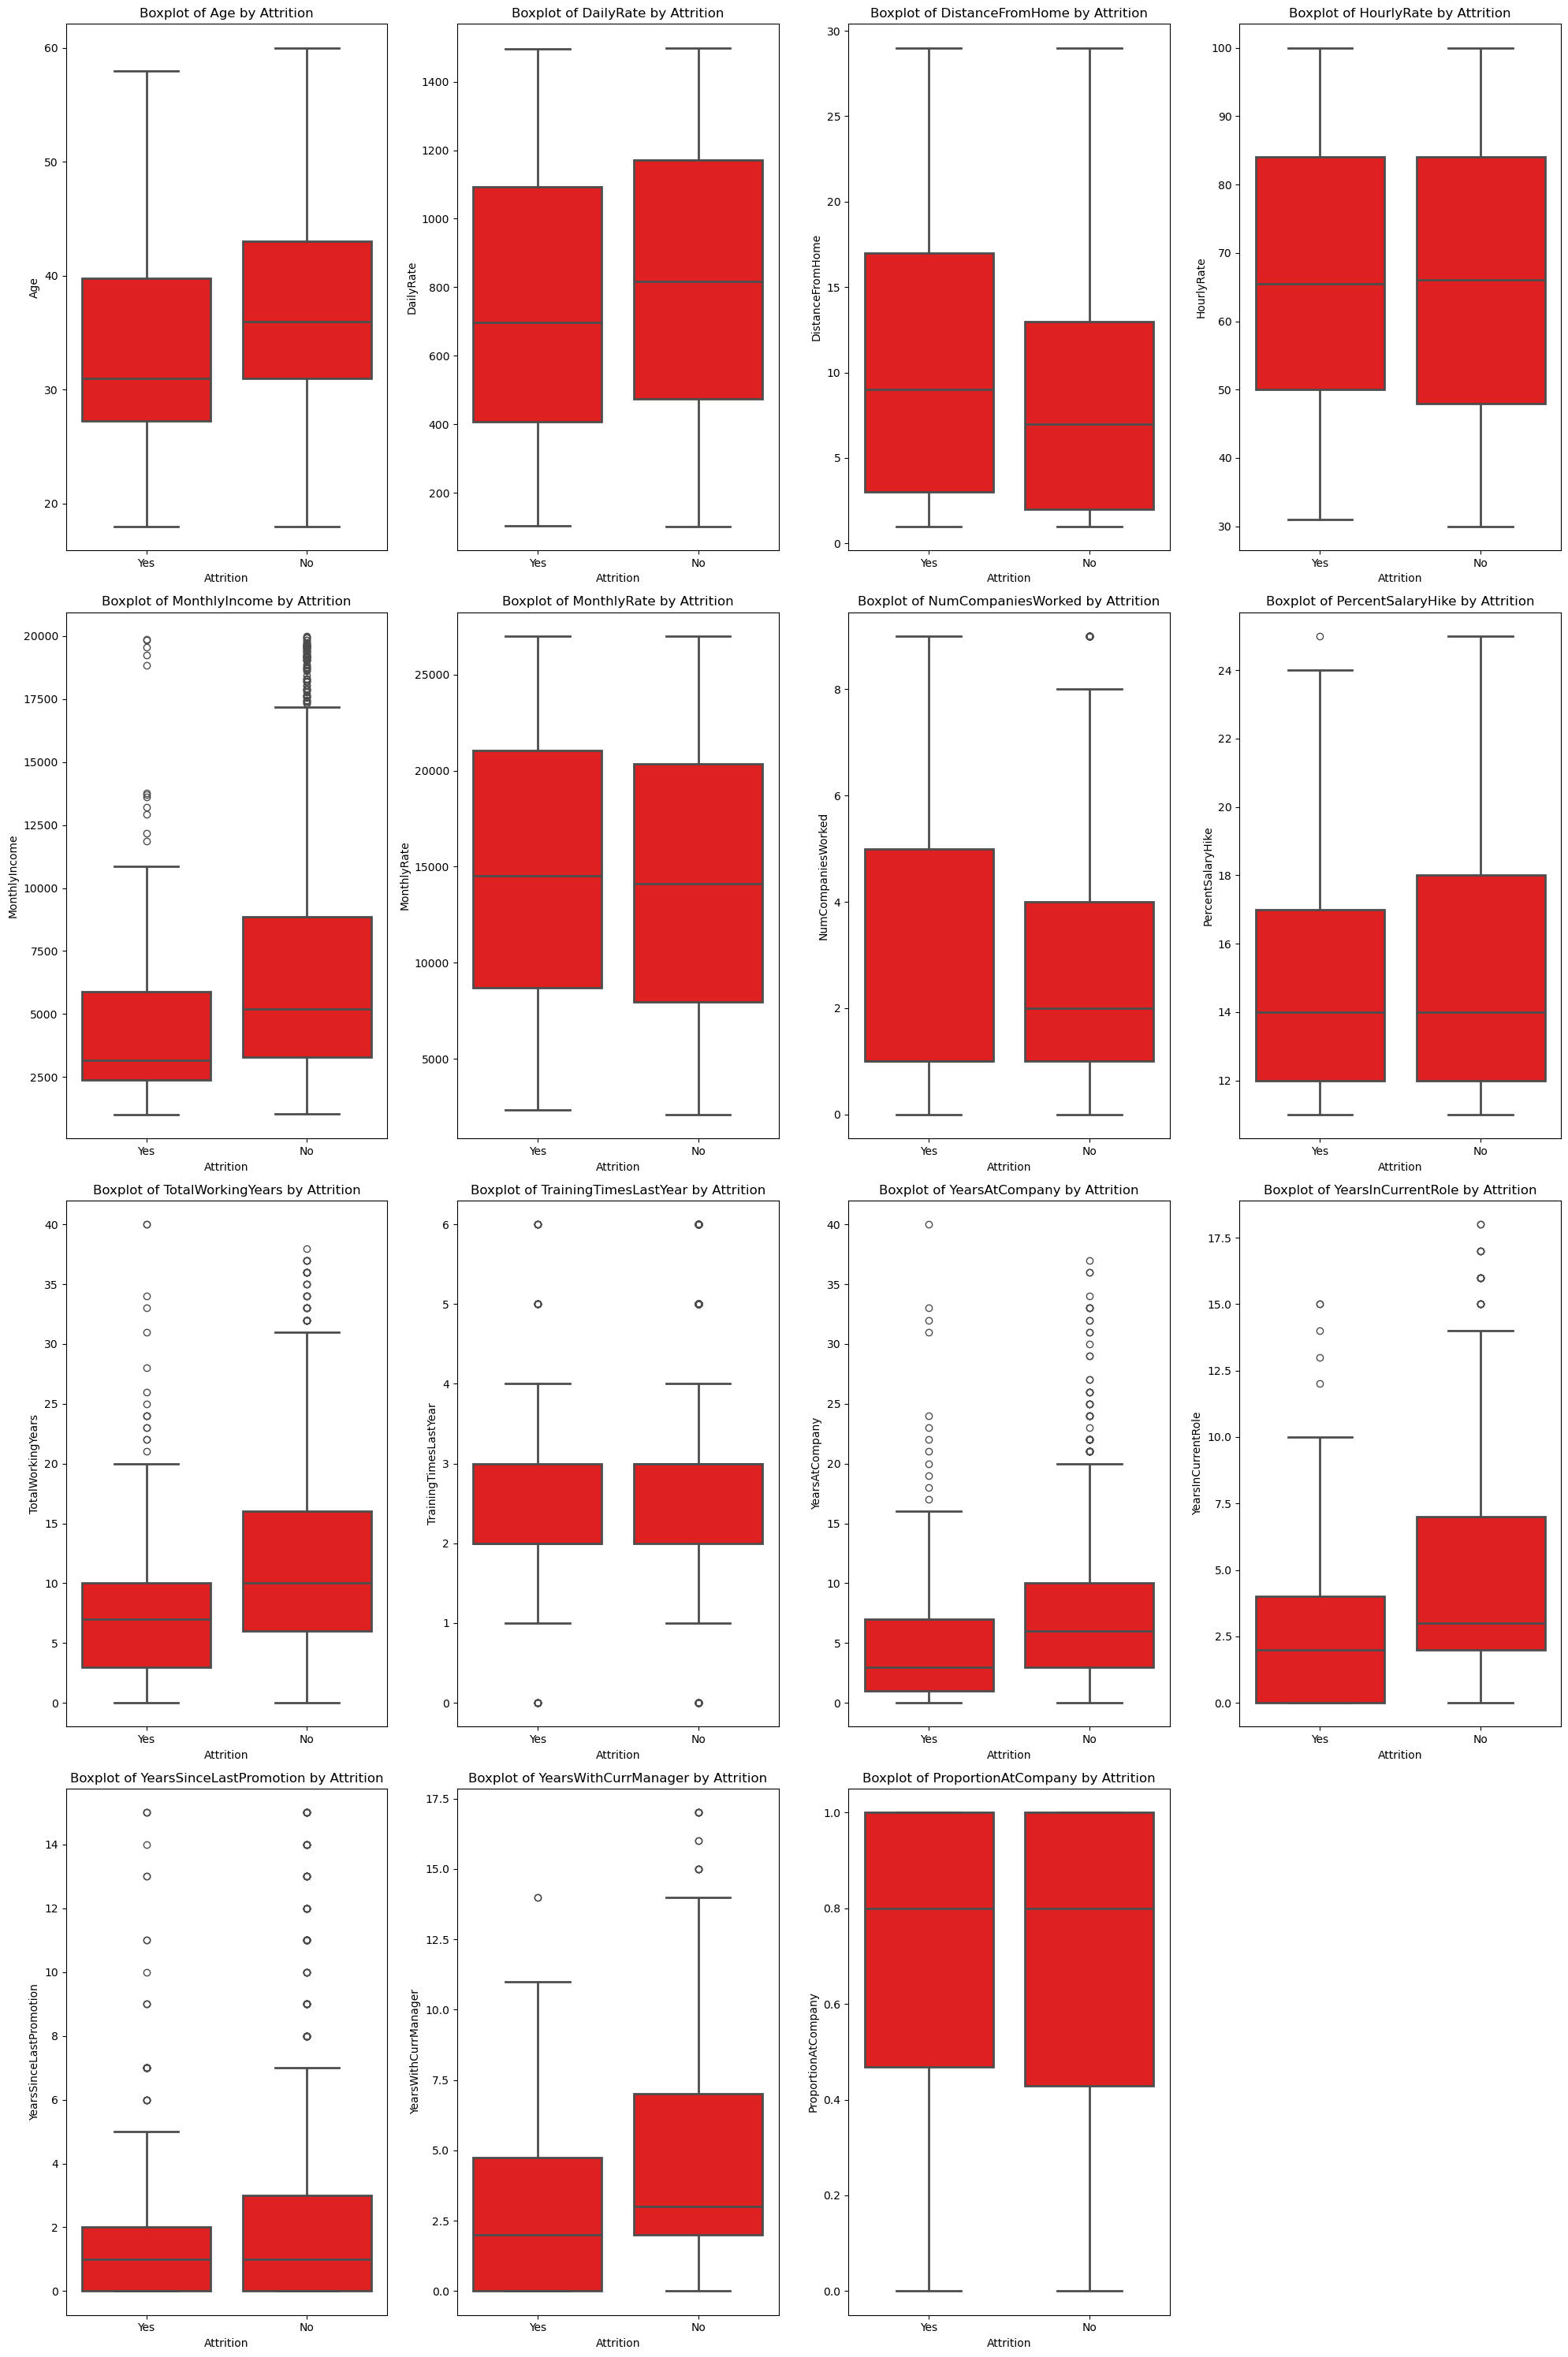

In [74]:
plt.close()
# Number of numeric columns
cols_per_row = 4
offset = 1
if len(num_cols) % cols_per_row == 0:
    offset = 0

fig, axes = plt.subplots(
    nrows=len(num_cols)//cols_per_row + offset,
    ncols=cols_per_row, 
    figsize=(20, len(num_cols)*2)
)

# Flatten axes array for easy iteration
axes = axes.flatten()


# Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i], color='red', linewidth=2)
    axes[i].set_title(f'Boxplot of {col} by Attrition')
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(col)


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

IndexError: index 16 is out of bounds for axis 0 with size 16

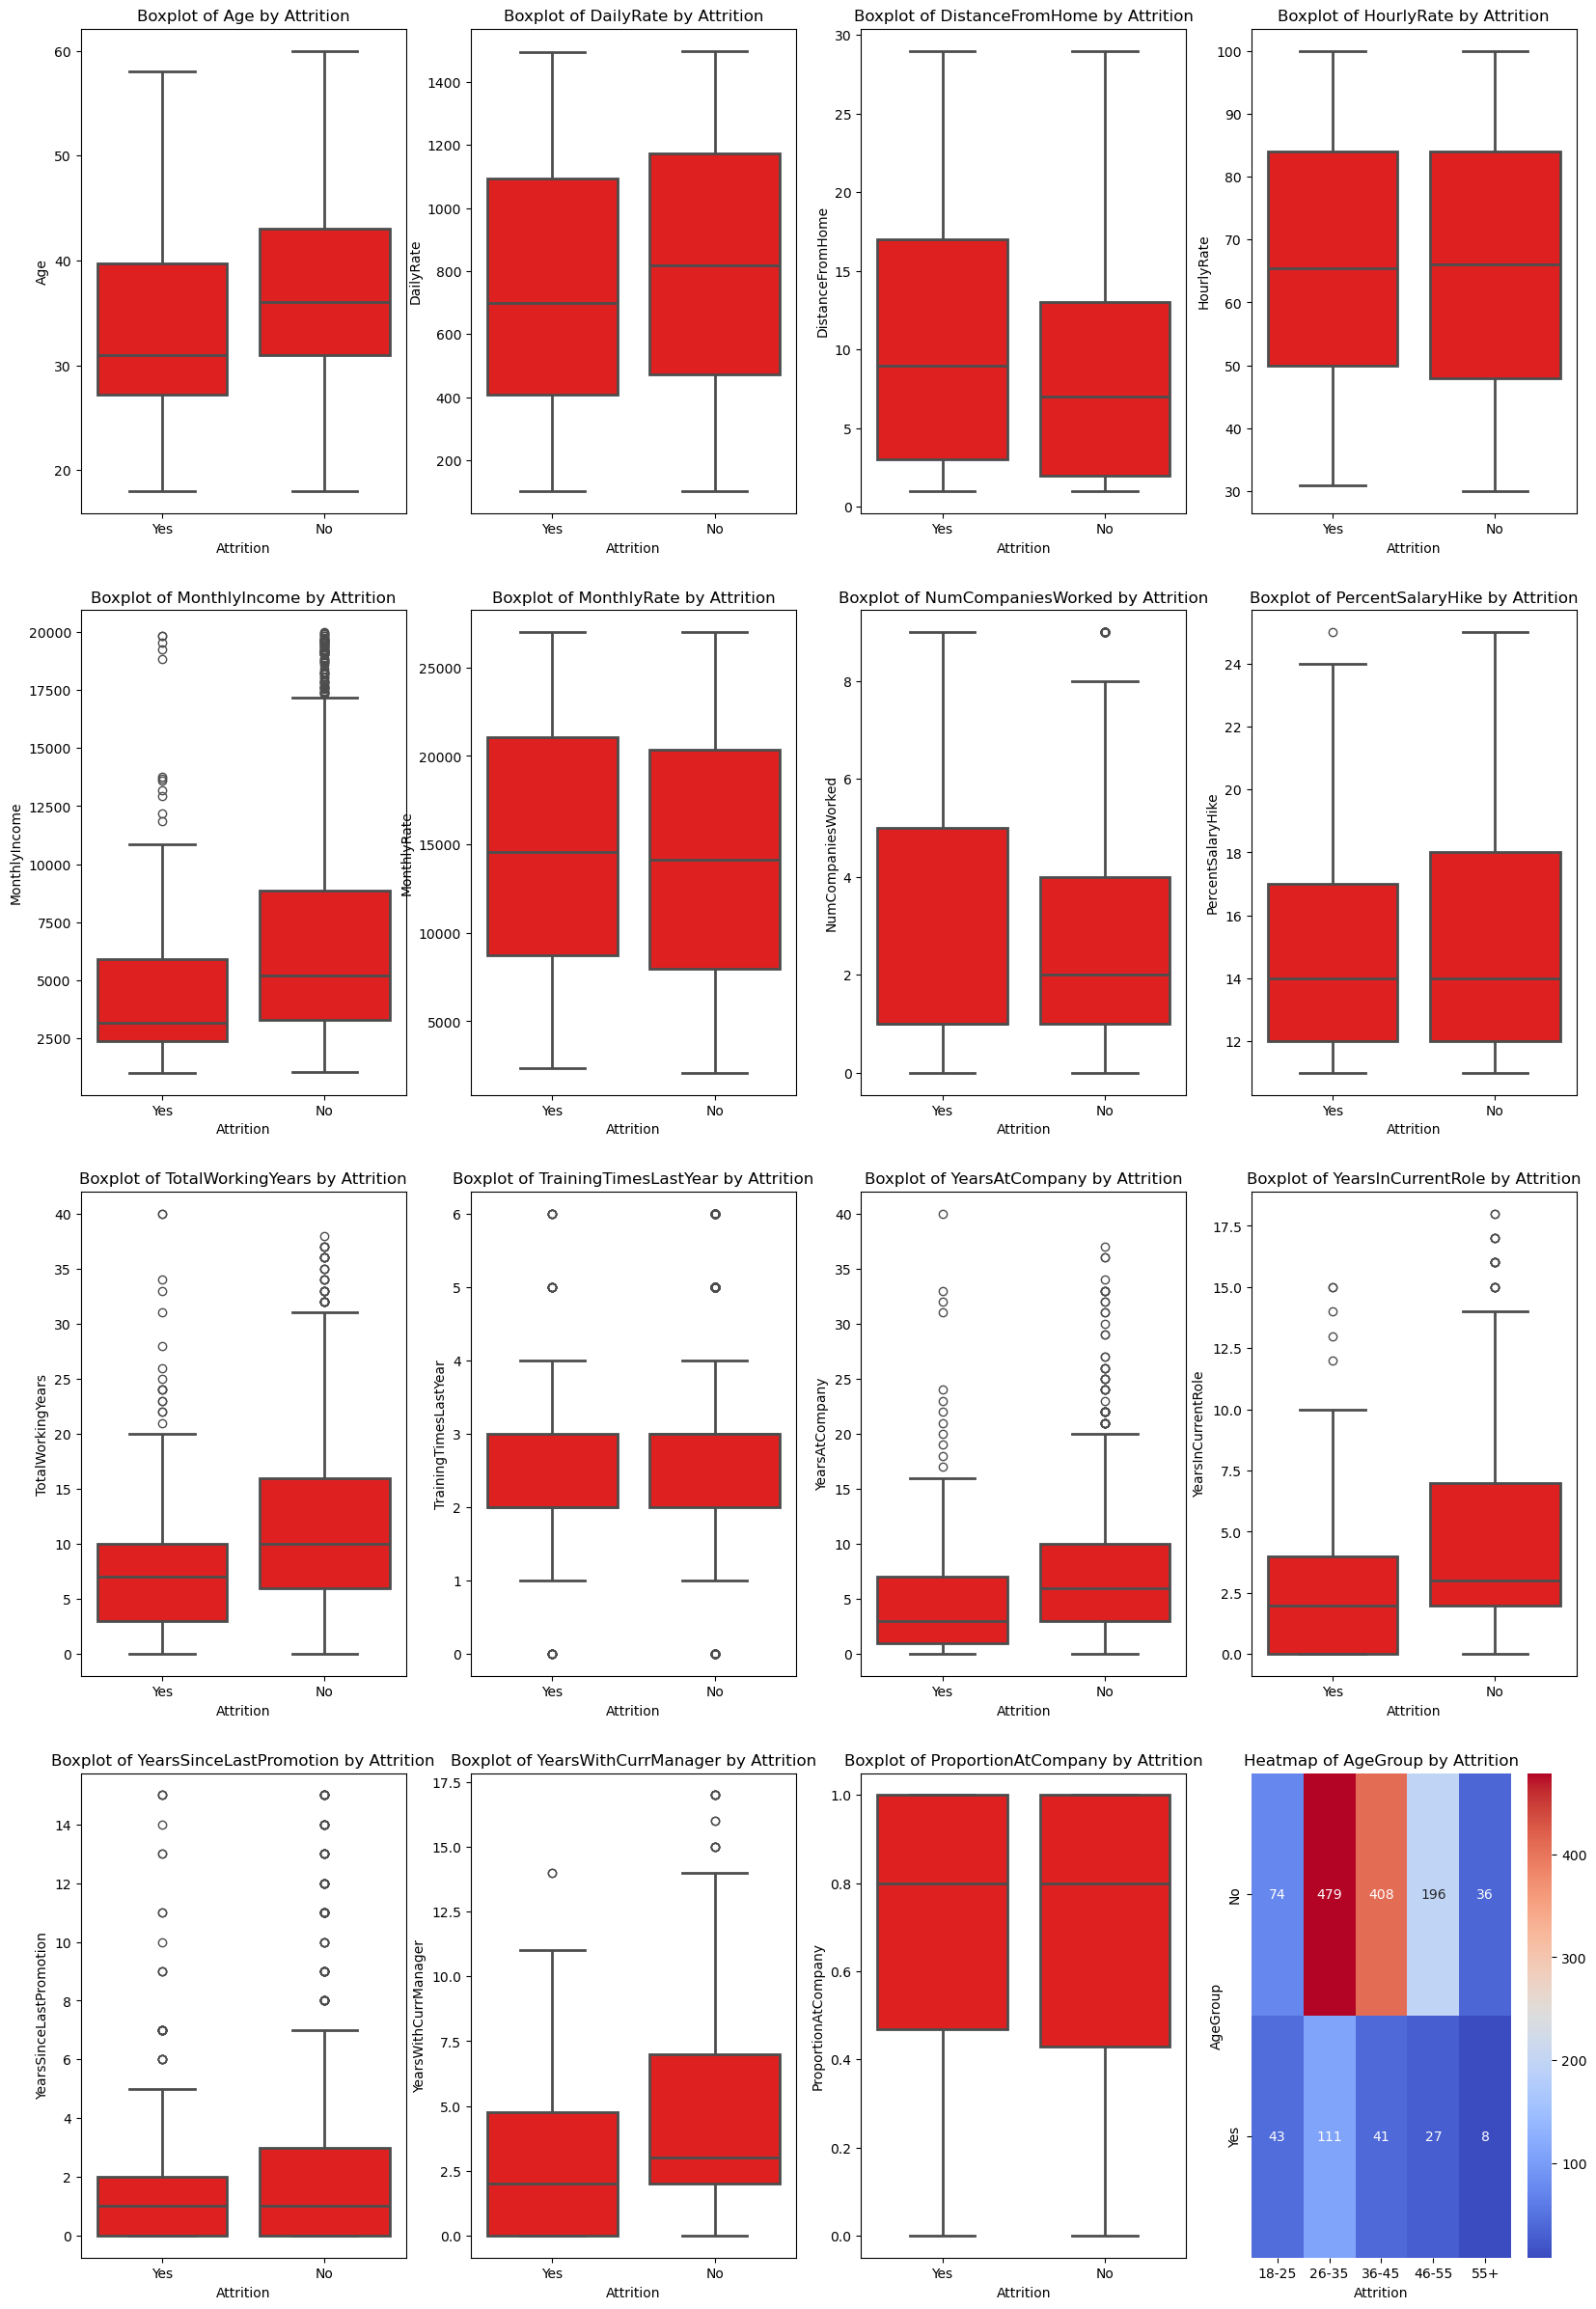

In [78]:
plt.close()
# Number of numeric columns
cols_per_row = 4
offset = 1
if len(num_cols+cat_cols) % cols_per_row == 0:
    offset = 0

fig, axes = plt.subplots(
    nrows=len(num_cols+cat_cols)//cols_per_row + offset,
    ncols=cols_per_row, 
    figsize=(20, len(num_cols+cat_cols)*2)
)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column as a boxplot grouped by 'Attrition'
for i, col in enumerate(num_cols):
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i], color='red', linewidth=2)
    axes[i].set_title(f'Boxplot of {col} by Attrition')
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(col)

# Plot each categorical column as a heatmap
for j, cat_col in enumerate(cat_cols):
    # Create a pivot table for the heatmap
    heatmap_data = df.groupby(['Attrition', cat_col]).size().unstack(fill_value=0)
    
    # Create a heatmap
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', ax=axes[i + 1 + j], cbar=True)
    
    # Set titles and labels
    axes[i + 1 + j].set_title(f'Heatmap of {cat_col} by Attrition')
    axes[i + 1 + j].set_xlabel('Attrition')
    axes[i + 1 + j].set_ylabel(cat_col)

# Remove any unused subplots
for k in range(i + 1 + j + 1, len(axes)):
    fig.delaxes(axes[k])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()